## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### 1. EDA (Exploratory Data Analysis)
            a) Univariate analysis
            b) Bivariate analysis
            c) Outlier treatment
### 2. Clustering
            1. Hopkins score
            2. Scaling
            3. K-Mean clustering
                    a) Silhouette score
                    b) Elbow curve method
                    c) Clustering
                    d) Plotting the Clusters
                    e) Cluster profiling
            4. Hierarchical Clustering
                    a) Single linkage
                    b) Complete linkage
                    c) Clustering and Cluster Profiling
            5. Conclusion

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## 1.EDA (Exploratory Data Analysis)

In [3]:
# Reading the data set

cntry_data = pd.read_csv("Country-data.csv")
cntry_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
cntry_data.shape

(167, 10)

In [5]:
cntry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# checking for null values

cntry_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We can see that there are no null values in our data set.

In [7]:
# statistical information of the data set

cntry_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Exports,Imports,Health are in % of GDP 

In [8]:
# CONVERTING EXPORTS,IMPORTS,HEALTH INTO THE ACTUAL VALUES 

cols = ['exports','health','imports']
for i in cols:
    cntry_data[i] = (cntry_data['gdpp']*cntry_data[i])/100

In [9]:
cntry_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


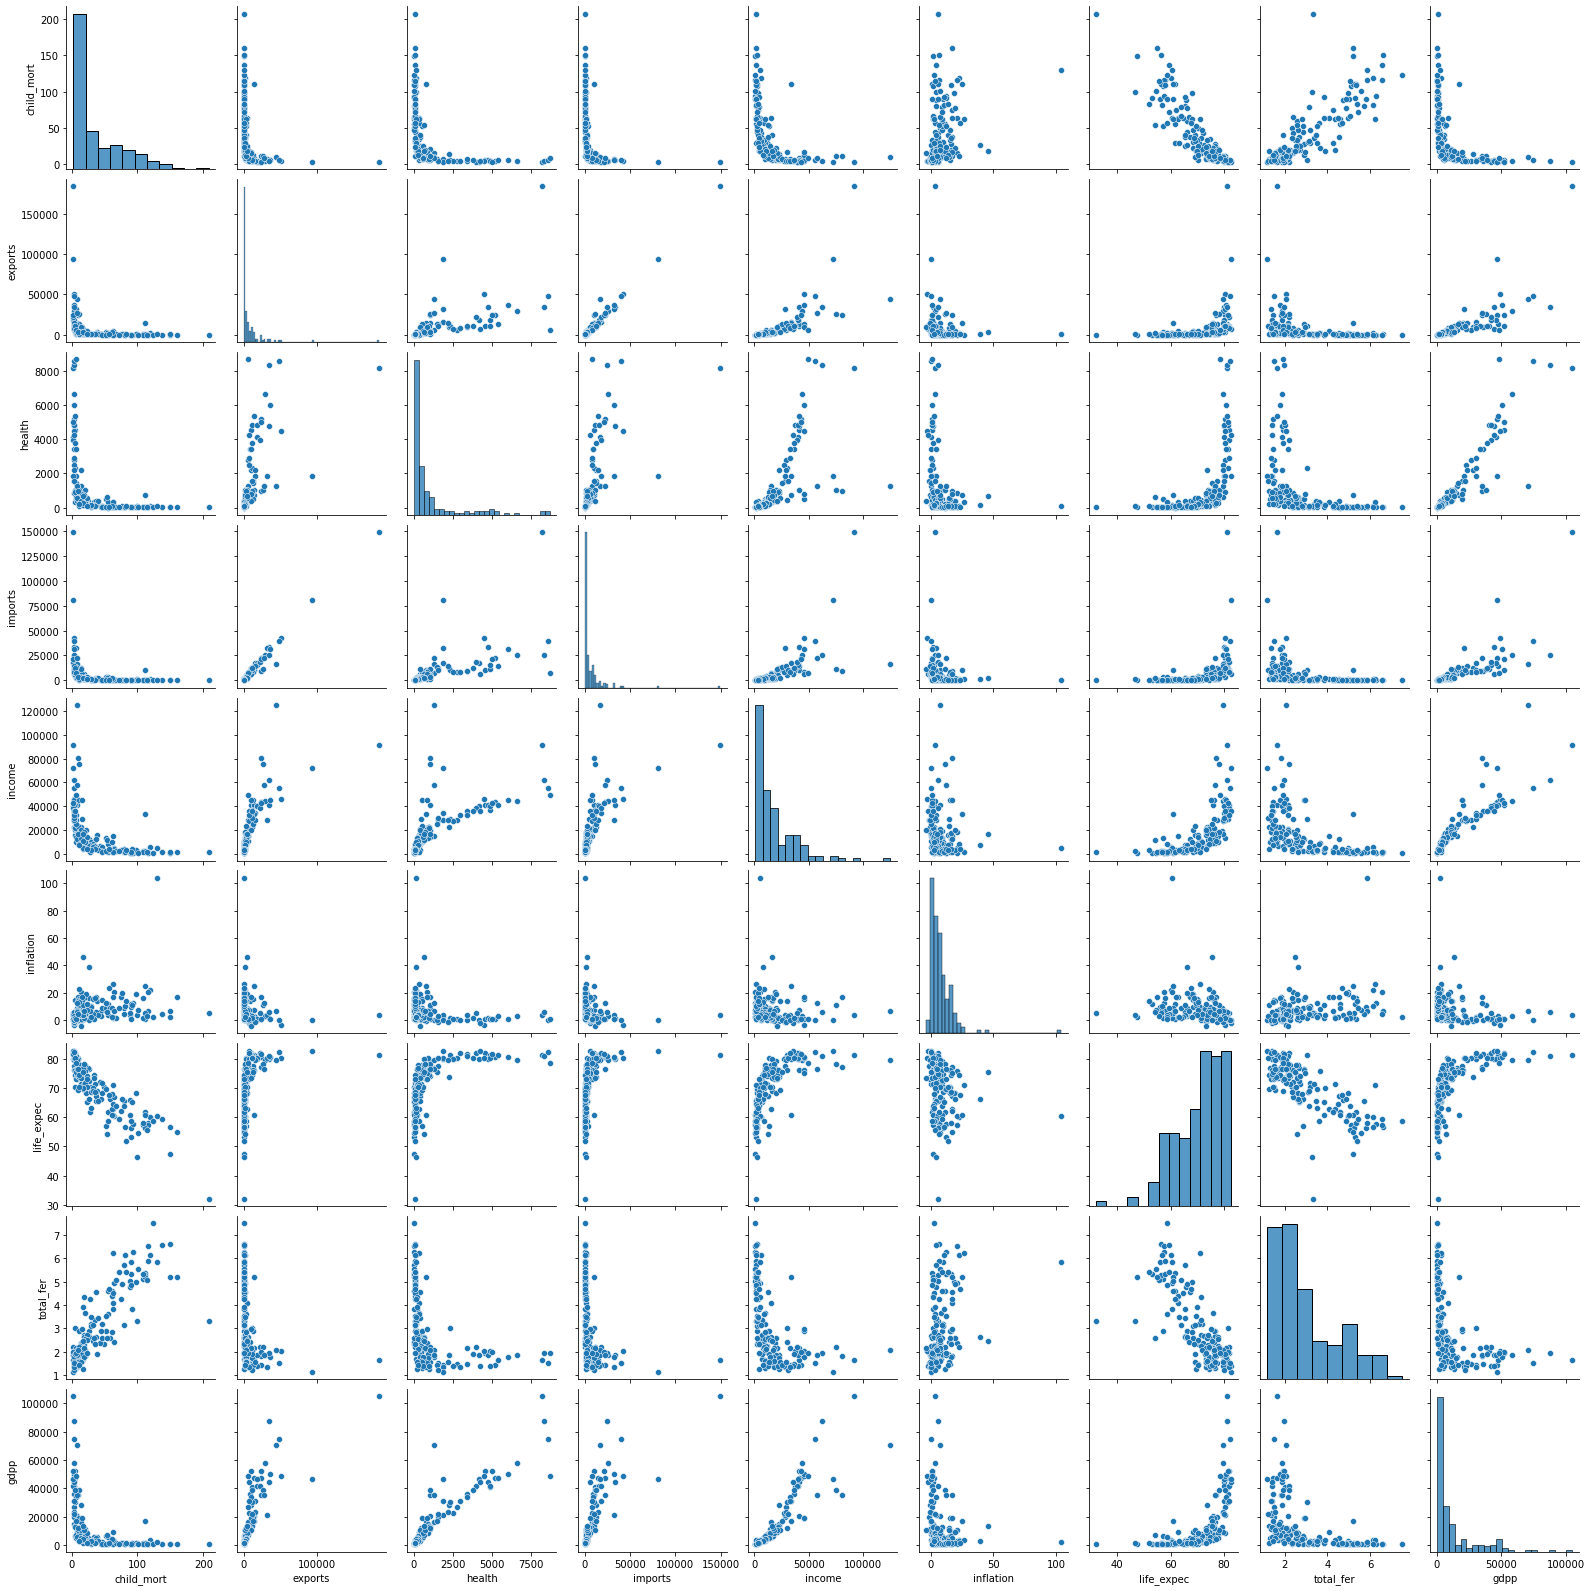

In [10]:
sns.pairplot(cntry_data)

### a) Univariate analysis 

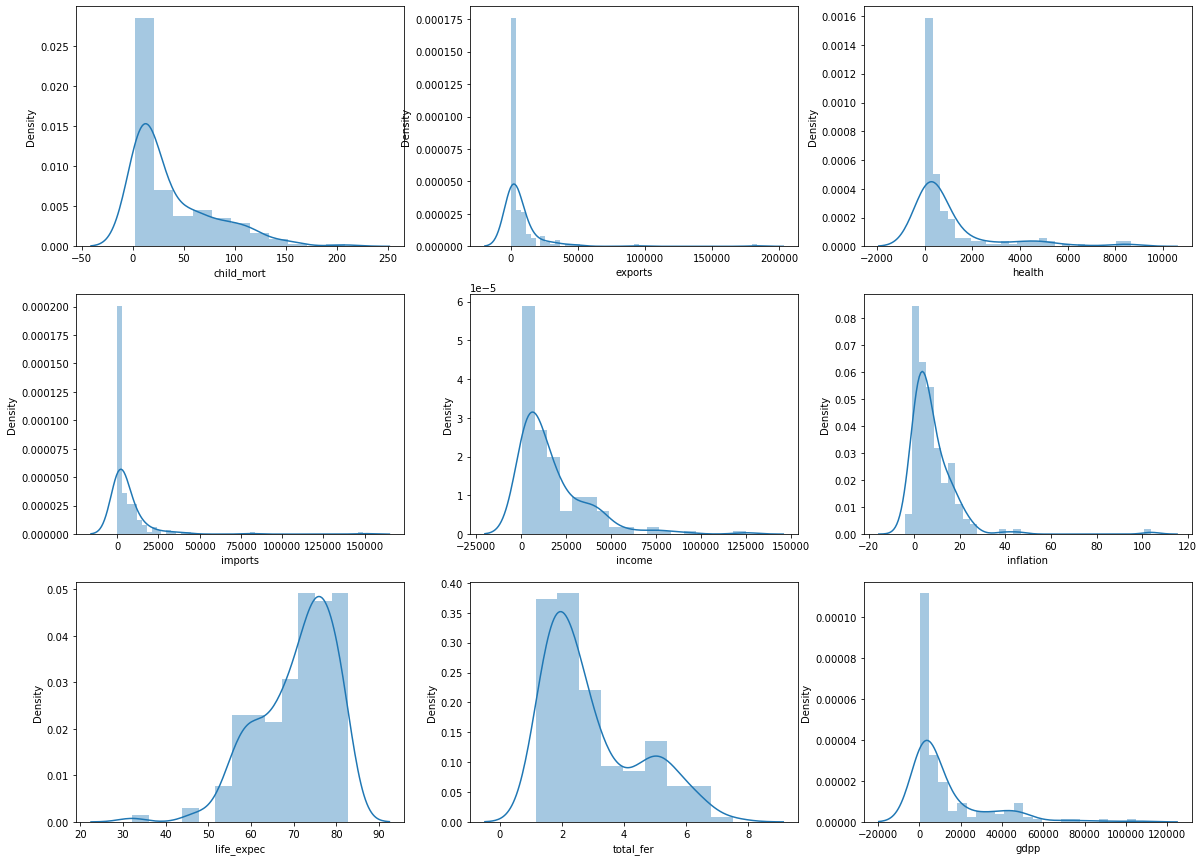

In [11]:
# PLOTTING ALL THE DIST PLOTS FOR ALL THE VARIABLES

plt.figure(figsize = (20,15))
features = cntry_data.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(cntry_data[i[1]])


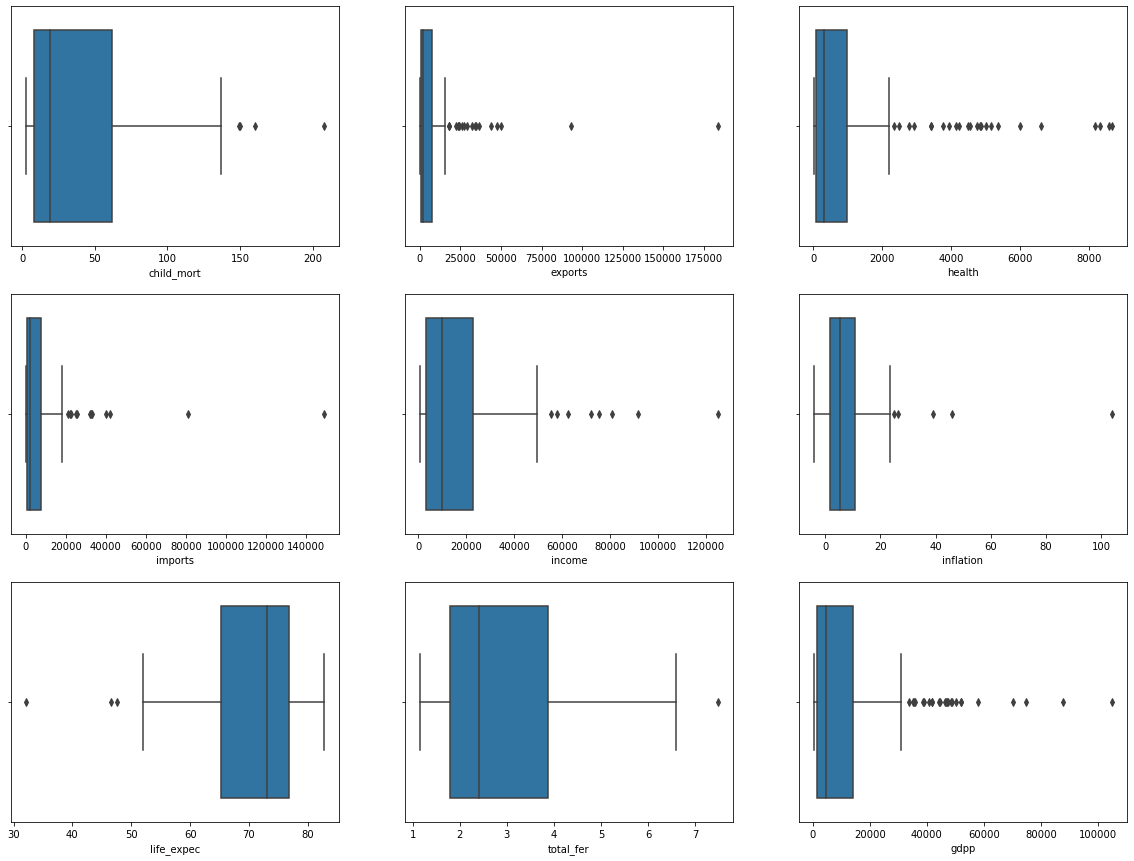

In [12]:
# PLOTTING ALL THE BOX PLOTS FOR THE VARIABLES


plt.figure(figsize = (20,15))
features = cntry_data.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= i[1],data = cntry_data)

We see the number of outliers in all the variables from above plot and the outliers have to be treated.

### b) Bivariate analysis

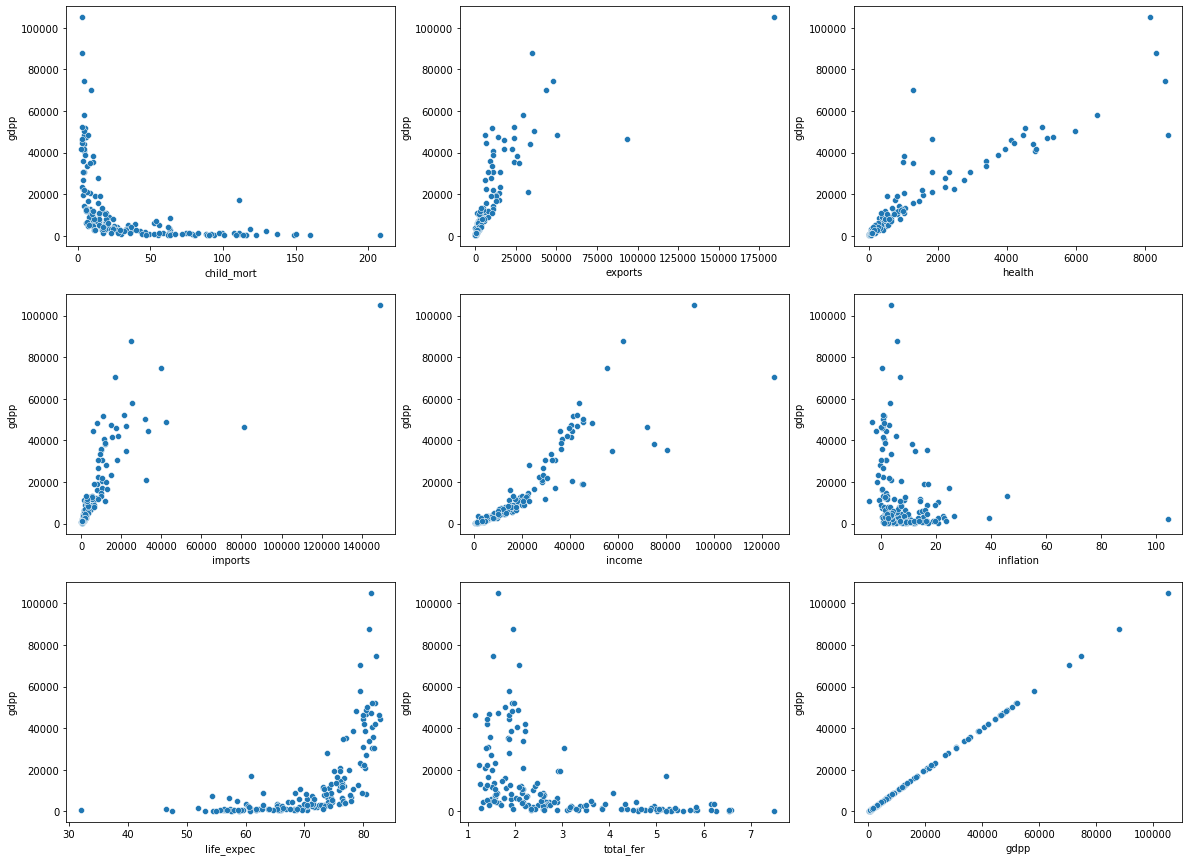

In [13]:
# PLOTTING THE SCATTER PLOTS WITH RESPECT TO GDP PER CAPITA (gdpp)

plt.figure(figsize = (20,15))
features = cntry_data.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x= i[1], y = 'gdpp', data = cntry_data)

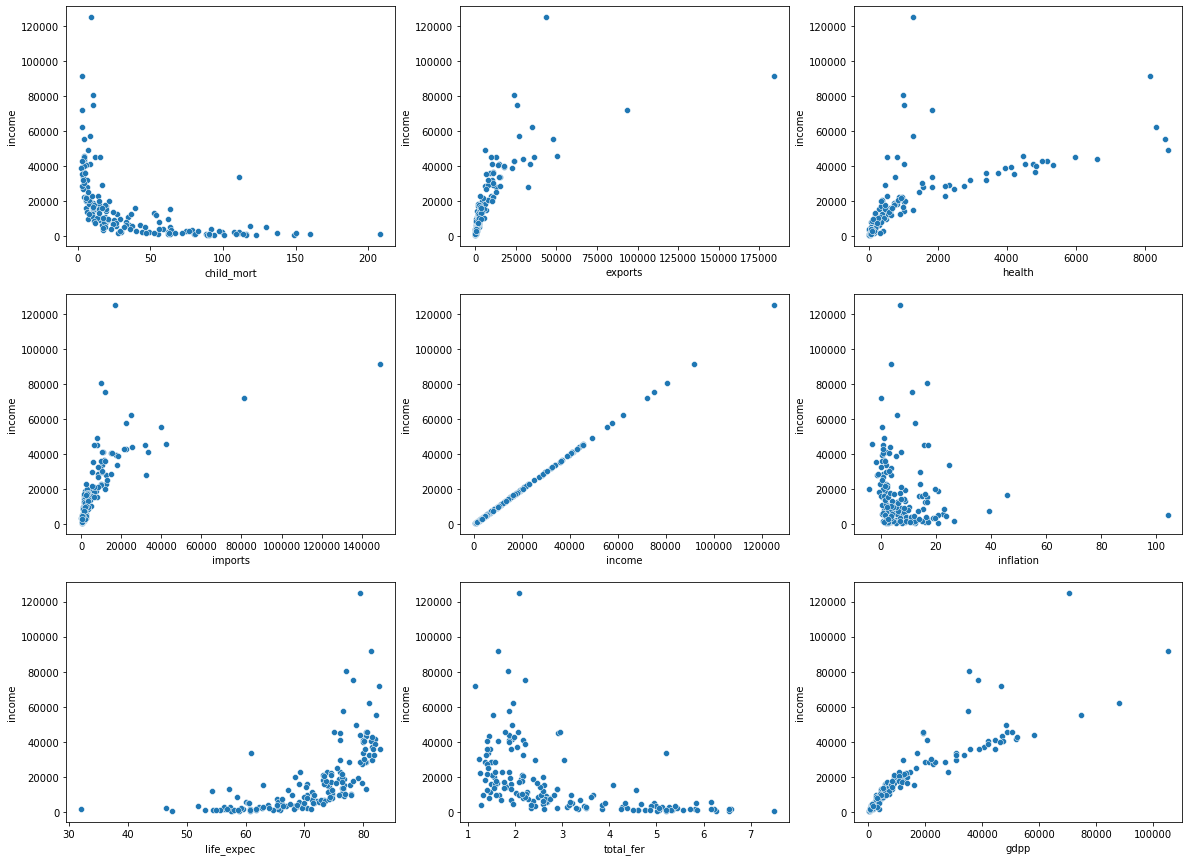

In [14]:
# PLOTTING THE SCATTER PLOTS WITH RESPECT TO INCOME

plt.figure(figsize = (20,15))
features = cntry_data.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x= i[1], y = 'income', data = cntry_data)

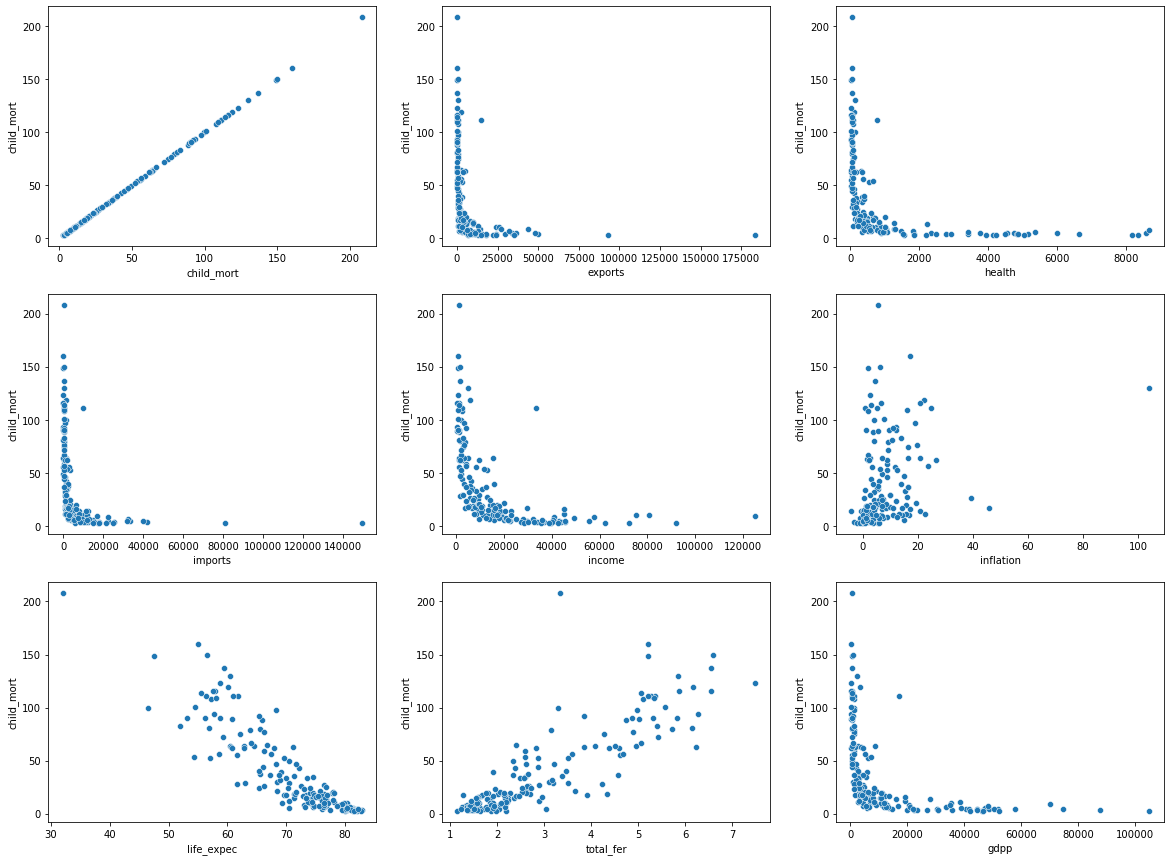

In [15]:
# PLOTTING THE SCATTER PLOTS WITH RESPECT TO CHILD_MORT

plt.figure(figsize = (20,15))
features = cntry_data.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x= i[1], y = 'child_mort', data = cntry_data)

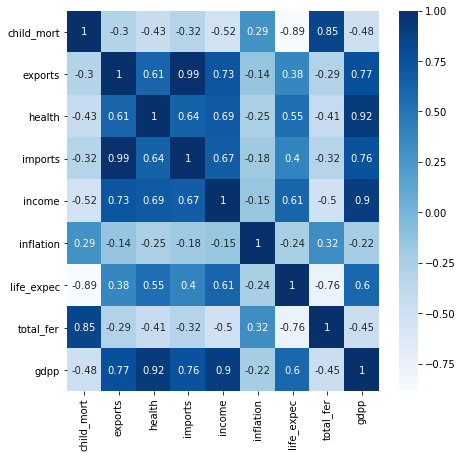

In [16]:
# PLOTTING THE HEAT-MAP FOR CORRELATION MATRIX

plt.figure(figsize = (7,7))
sns.heatmap(cntry_data.corr(),annot =True,cmap = 'Blues')
plt.show()

### c) Outlier treatment

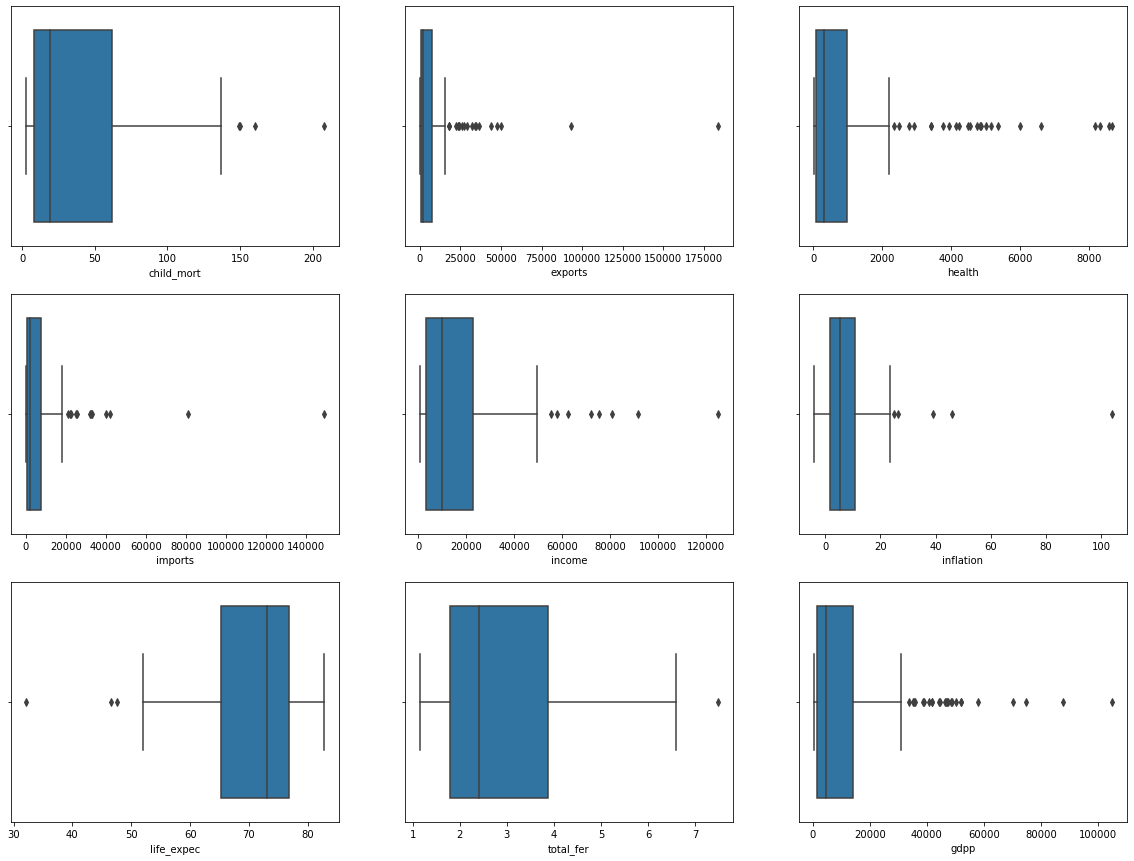

In [17]:
# PLOTTING ALL THE BOX PLOTS FOR THE VARIABLES


plt.figure(figsize = (20,15))
features = cntry_data.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= i[1],data = cntry_data)

#### CAPPING THE VALUES

In [18]:
# CAPPING THE UPPER RANGE OF OUTLIERS FOR 'exports','health','imports','income','inflation','total_fer','gdpp'.

features = ['exports','health','imports','income','inflation','total_fer','gdpp']
for i in features:
    q1 = cntry_data[i].quantile(0.05)
    q4 = cntry_data[i].quantile(0.95)
    cntry_data[i][cntry_data[i] <= q1] = q1
    cntry_data[i][cntry_data[i] >= q4] = q4

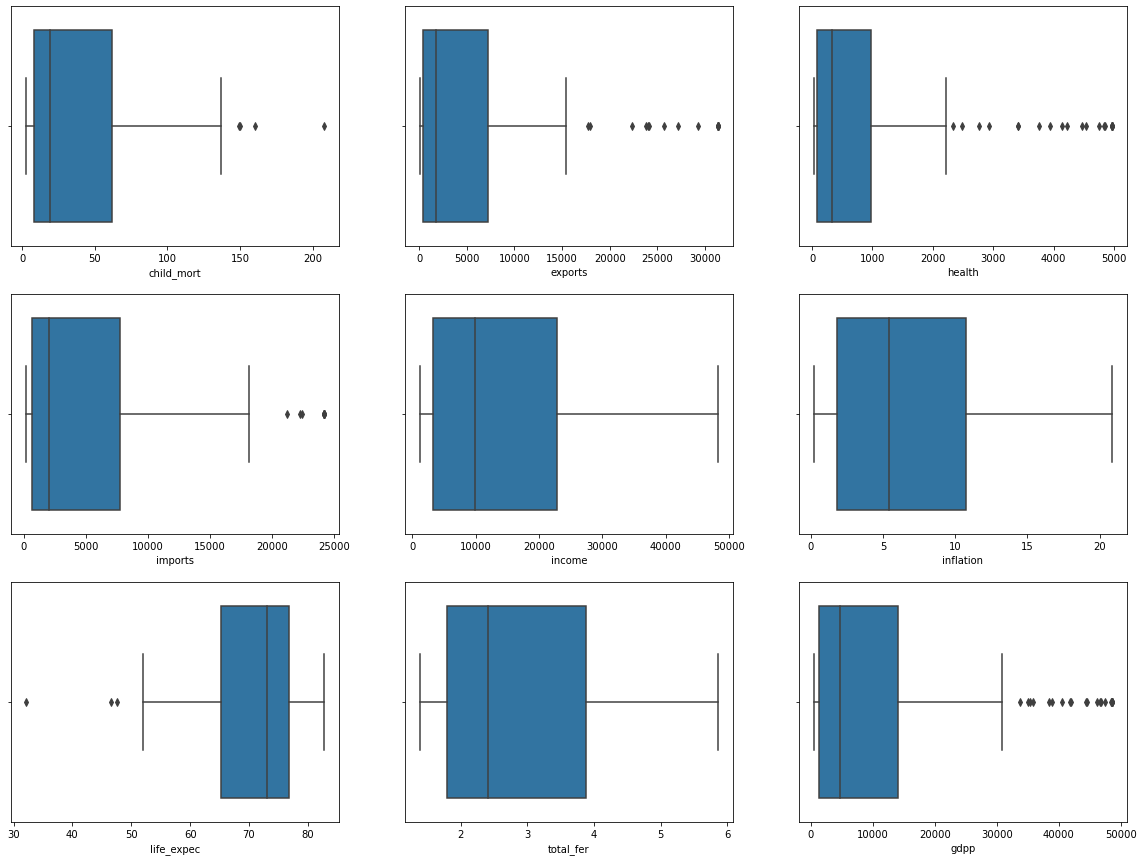

In [19]:
# PLOTTING ALL THE BOX PLOTS FOR THE VARIABLES


plt.figure(figsize = (20,15))
features = cntry_data.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= i[1],data = cntry_data)

We can see that the high range outliers are capped to 95th percentile and low range outliers are capped to their 5th percentile

## 2. Clustering

### 1. Hopkins score

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(cntry_data.drop('country',axis = 1))

0.8928021972053668

We can see that the data has a hopkins score above 0.85. Hence the data is clustered well.

### 2. Feature Scaling

In [22]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [23]:
# USING STANDARD SCALER FOR FEATURE SCALING

scaler = StandardScaler()
cntry_data_scaled = scaler.fit_transform(cntry_data.drop('country',axis = 1))
cntry_data_scaled

array([[ 1.29153238, -0.66803864, -0.62977844, ..., -1.61909203,
         2.02071786, -0.7578739 ],
       [-0.5389489 , -0.54238923, -0.47380714, ...,  0.64786643,
        -0.88733091, -0.52377507],
       [-0.27283273, -0.47604845, -0.53034406, ...,  0.67042323,
        -0.02258739, -0.49928636],
       ...,
       [-0.37231541, -0.56600553, -0.59686482, ...,  0.28695762,
        -0.67811877, -0.70777132],
       [ 0.44841668, -0.63033074, -0.61187406, ..., -0.34463279,
         1.21873798, -0.70777132],
       [ 1.11495062, -0.61312123, -0.59935647, ..., -2.09278484,
         1.72782086, -0.69784347]])

In [24]:
# CREATING SCALED DATA FRAME

cntry_data_scaled = pd.DataFrame(cntry_data_scaled,columns = cntry_data.columns[1:])
cntry_data_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.619092,2.020718,-0.757874
1,-0.538949,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.647866,-0.887331,-0.523775
2,-0.272833,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.670423,-0.022587,-0.499286
3,2.007808,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.179234,2.049310,-0.560839
4,-0.695634,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.704258,-0.552591,0.012991


### 3. K-Mean clustering

#### a) Silhouette score:

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
# SILHOUETTE SCORE

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(cntry_data_scaled)
    ss.append([k,silhouette_score(cntry_data_scaled,kmean.labels_)])


In [27]:
temp = pd.DataFrame(ss)
temp.columns = ['k','silhouette_score']
temp

,k,silhouette_score
0,2,0.482923
1,3,0.410790
2,4,0.375622
3,5,0.321507
4,6,0.288096
5,7,0.329964
6,8,0.339337
7,9,0.332489
8,10,0.316169


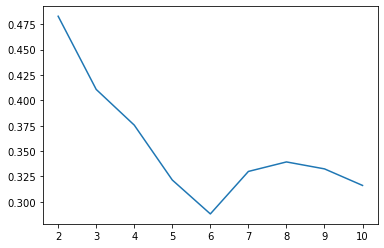

In [28]:

plt.plot(temp['k'],temp['silhouette_score'])

#### b) Elbow curve method:

In [29]:
# ELBOW CURVE METHOD

ssd=[]
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(cntry_data_scaled)
    ssd.append([k,kmean.inertia_])

In [30]:
temp = pd.DataFrame(ssd)
temp.columns = ['k','SSD']
temp

,k,SSD
0,2,758.319400
1,3,474.854379
2,4,398.809522
3,5,345.690960
4,6,300.317603
5,7,259.175696
6,8,227.077607
7,9,205.465734
8,10,187.417849


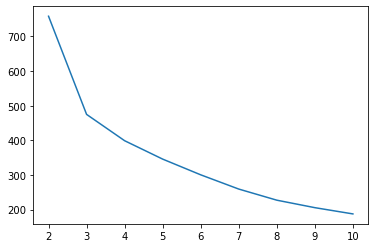

In [31]:
plt.plot(temp['k'],temp['SSD'])

We can confirm the value of 'k' as 3 from the above two methods.

#### c) Clustering:

In [32]:
# k=3

kmean = KMeans(n_clusters = 3,random_state = 50,max_iter = 50)
kmean.fit(cntry_data_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [33]:
cntry_data_kmean = cntry_data.copy()

In [34]:
label = pd.DataFrame(kmean.labels_,columns = ['label'])
df_kmean = pd.concat([cntry_data,label],axis=1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0


#### d) Plotting the clusters:

Text(0.5, 1.0, 'income vs child_mort')

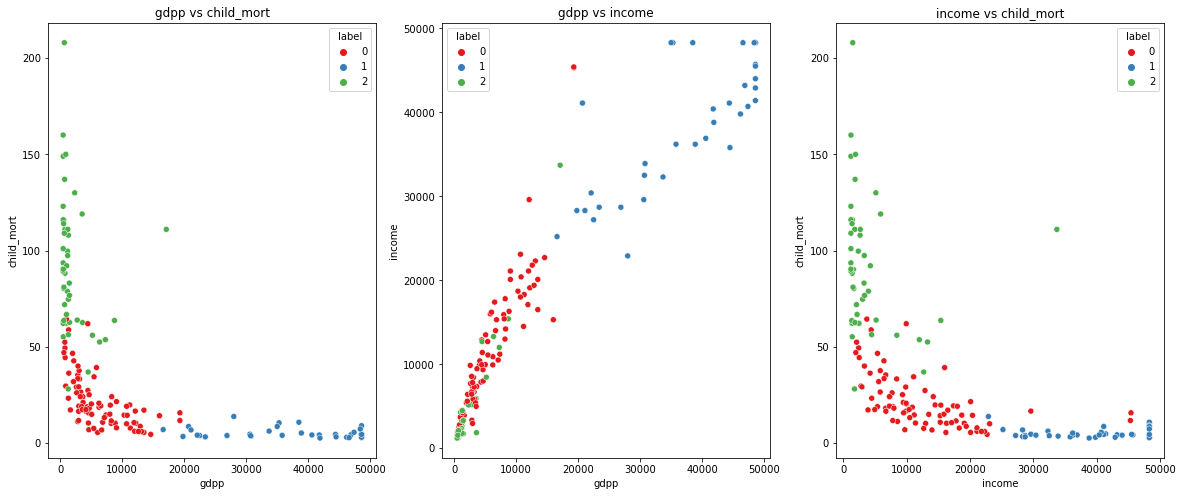

In [35]:
plt.figure(figsize = (20,8))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort' , hue= 'label',data = df_kmean , palette = 'Set1')
plt.title("gdpp vs child_mort")
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'income' , hue= 'label',data = df_kmean , palette = 'Set1')
plt.title("gdpp vs income")
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'child_mort' , hue= 'label',data = df_kmean , palette = 'Set1')
plt.title("income vs child_mort")

#### e) Cluster Profiling:

<AxesSubplot:xlabel='label'>

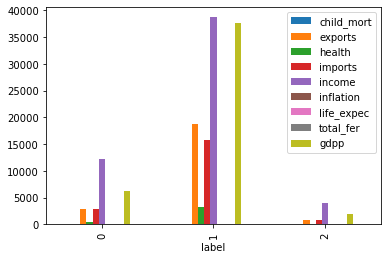

In [36]:
# MAKING INFERENCES OUT OF THE CLUSTERS


df_kmean.drop('country',axis =1).groupby('label').mean().plot(kind = 'bar')

Dropping the columns 'exports','imports','health','inflation','life_expec','total_fer' and plotting the bar graph

<AxesSubplot:xlabel='label', ylabel='child_mort'>

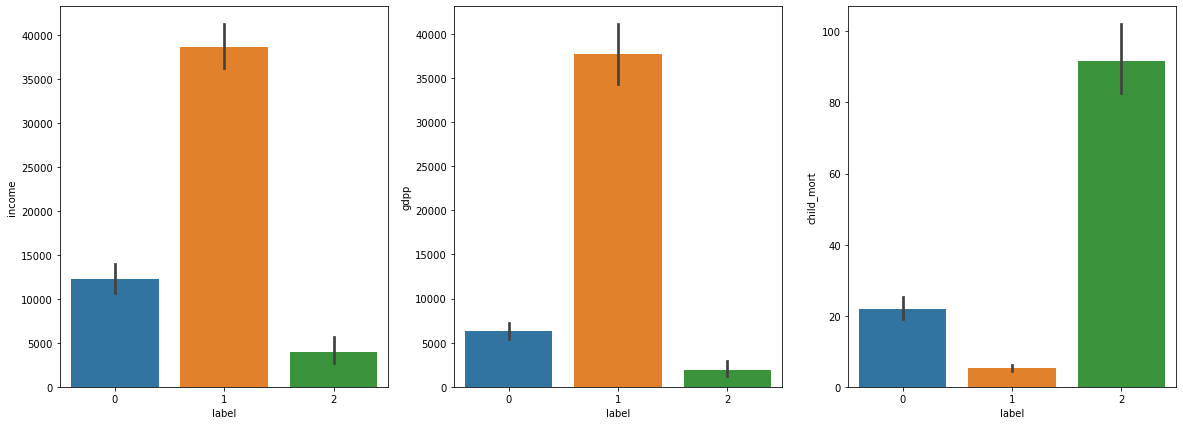

In [37]:
# PLOTS
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(x = 'label',y = 'income',data = df_kmean)
plt.subplot(1,3,2)
sns.barplot(x = 'label',y = 'gdpp',data = df_kmean)
plt.subplot(1,3,3)
sns.barplot(x = 'label',y = 'child_mort',data = df_kmean)

From the above plots, we can see that 'income' and 'gdpp' are low for clusters labeled as '2' and ' child_mort' is high for cluster labeled as '2'.

This determines the countries of cluster '2' require AID.

In [38]:
# Filtering the data for the cluster

df_kmean[df_kmean['label']==2]['country']


0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [39]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income','gdpp'],ascending =[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.74420,428.314,1500.0,5.45,32.1,3.330,662.0,2
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.20,55.0,5.200,465.9,2
32,Chad,150.0,330.0960,40.63410,390.195,1930.0,6.39,56.5,5.861,897.0,2
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.210,465.9,2
97,Mali,137.0,161.4240,35.25840,248.508,1870.0,4.37,59.5,5.861,708.0,2
113,Nigeria,130.0,589.4900,118.13100,405.420,5150.0,20.87,60.5,5.840,2330.0,2
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,5.861,465.9,2
3,Angola,119.0,2199.1900,100.60500,1514.370,5900.0,20.87,60.1,5.861,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,5.861,465.9,2
25,Burkina Faso,116.0,110.4000,38.75500,170.200,1430.0,6.81,57.9,5.861,575.0,2


### 4. Hierarchical Clustering

In [40]:
# IMPORTING LIBRARES

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [41]:
cntry_data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.619092,2.020718,-0.757874
1,-0.538949,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.647866,-0.887331,-0.523775
2,-0.272833,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.670423,-0.022587,-0.499286
3,2.007808,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.179234,2.049310,-0.560839
4,-0.695634,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.704258,-0.552591,0.012991


#### a) Single linkage:

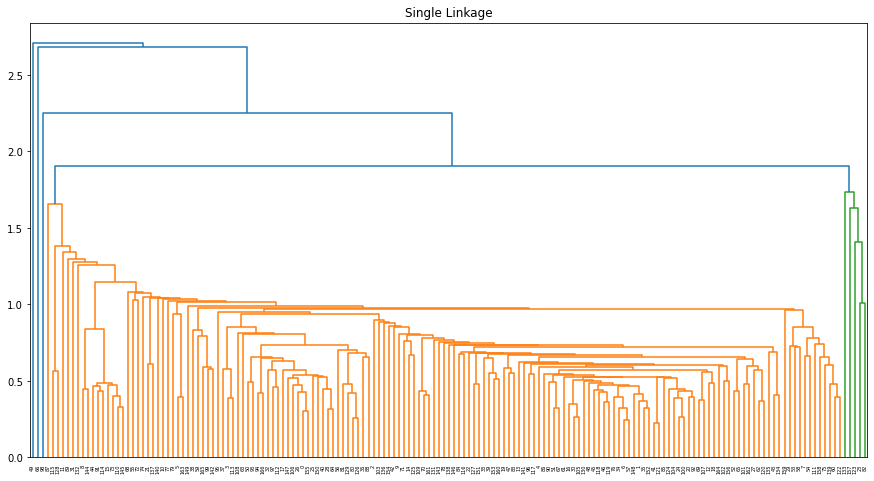

In [42]:
plt.figure(figsize = (15,8))
mergings = linkage(cntry_data_scaled,method = "single",metric = "euclidean")
dendrogram(mergings)
plt.title("Single Linkage")
plt.show()

Single linkage did not produce a good enough result for us to analyse the clusters. Hence, we go for complete linkage method.

#### b) Complete linkage:

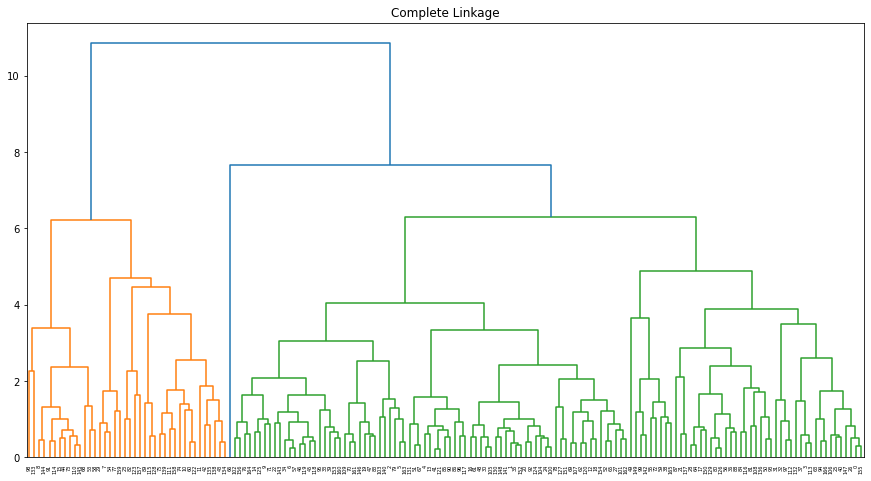

In [43]:
plt.figure(figsize = (15,8))
mergings = linkage(cntry_data_scaled,method = "complete",metric = "euclidean")
dendrogram(mergings)
plt.title("Complete Linkage")
plt.show()

We can see clearly that, there can be 3 clusters.

#### c) Clustering & Cluster Profiling:

In [44]:
# FINDING CLUSTER LABELS

cluster_labels = cut_tree(mergings,n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# ASSIGN THE CLUSTER LABELS

cntry_data["cluster_labels"]=cluster_labels
cntry_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0


<AxesSubplot:xlabel='cluster_labels'>

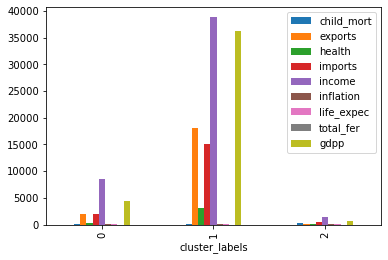

In [46]:
# MAKING INFERENCES OUT OF THE CLUSTERS

cntry_data.drop('country',axis =1).groupby('cluster_labels').mean().plot(kind = 'bar')

Label '2' has the lowest values for all variables.

<AxesSubplot:xlabel='cluster_labels', ylabel='child_mort'>

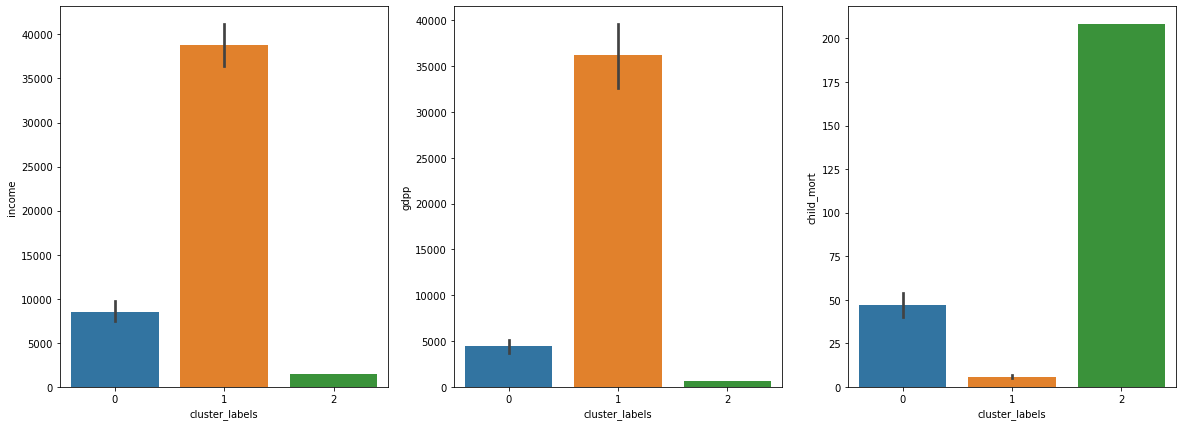

In [47]:
# PLOTS

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(x = 'cluster_labels',y = 'income',data = cntry_data)
plt.subplot(1,3,2)
sns.barplot(x = 'cluster_labels',y = 'gdpp',data = cntry_data)
plt.subplot(1,3,3)
sns.barplot(x = 'cluster_labels',y = 'child_mort',data = cntry_data)

From the above plots, we can see that 'income' and 'gdpp' are low for clusters labeled as '2' and ' child_mort' is high for cluster labeled as '2'.

This determines the countries of cluster '2' require AID.

<AxesSubplot:xlabel='cluster_labels', ylabel='child_mort'>

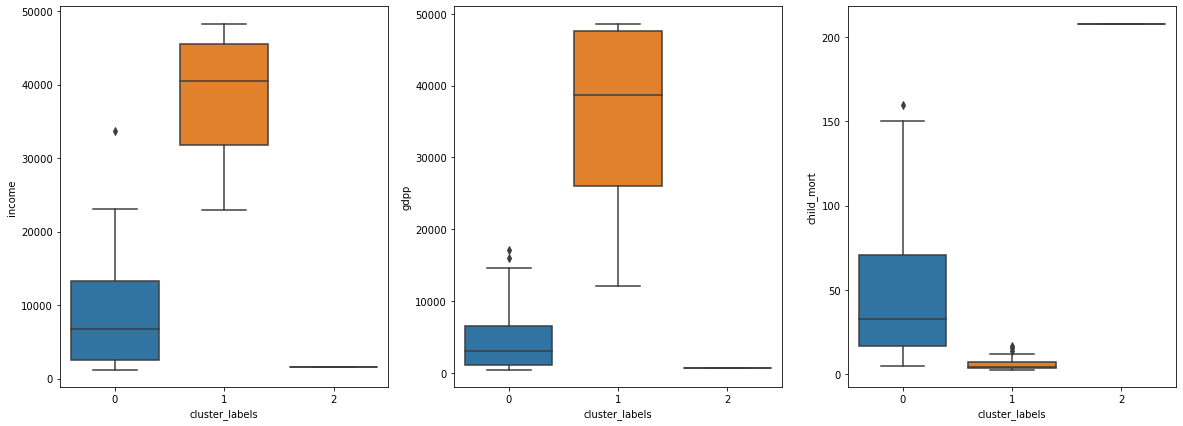

In [48]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(x = 'cluster_labels',y = 'income',data = cntry_data)
plt.subplot(1,3,2)
sns.boxplot(x = 'cluster_labels',y = 'gdpp',data = cntry_data)
plt.subplot(1,3,3)
sns.boxplot(x = 'cluster_labels',y = 'child_mort',data = cntry_data)

In [49]:
# Filtering the data for the cluster

cntry_data[cntry_data['cluster_labels']==2]['country'].head()


66    Haiti
Name: country, dtype: object

### 5. Conclusion



### a) Top 5-countries obtained from K-Means clustering

In [50]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income','gdpp',],ascending =[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.2860,45.74420,428.314,1500.0,5.45,32.1,3.330,662.0,2
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.20,55.0,5.200,465.9,2
32,Chad,150.0,330.0960,40.63410,390.195,1930.0,6.39,56.5,5.861,897.0,2
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.210,465.9,2
97,Mali,137.0,161.4240,35.25840,248.508,1870.0,4.37,59.5,5.861,708.0,2
113,Nigeria,130.0,589.4900,118.13100,405.420,5150.0,20.87,60.5,5.840,2330.0,2
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,5.861,465.9,2
3,Angola,119.0,2199.1900,100.60500,1514.370,5900.0,20.87,60.1,5.861,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,5.861,465.9,2
25,Burkina Faso,116.0,110.4000,38.75500,170.200,1430.0,6.81,57.9,5.861,575.0,2


###### 10- Countries which are in direst need of aid obtained from K-Means clustering are:
            1.Haiti
            2.Sierra Leone
            3.Chad
            4.Central African Republic
            5.Mali
            6.Nigeria
            7.Niger
            8.Angola
            9.Congo,Dem.Rep.
            10.Burkina Faso

### b) Top 5-countries obtained from Hierarchical clustering

In [51]:
cntry_data[cntry_data['cluster_labels']==2]['country'].head()

66    Haiti
Name: country, dtype: object

###### Only "Haiti" is shown as the country which is in direst need of aid but we need top 5 countries .
###### So, we take the cluster which has low income and low gdpp & high child_mort i.e cluster '0'

In [52]:
cntry_data[cntry_data['cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp'],ascending =[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
132,Sierra Leone,160.0,70.4688,52.26900,169.281,1220.0,17.20,55.0,5.200,465.9,0
32,Chad,150.0,330.0960,40.63410,390.195,1930.0,6.39,56.5,5.861,897.0,0
31,Central African Republic,149.0,70.4688,26.71592,169.281,1213.0,2.01,47.5,5.210,465.9,0
97,Mali,137.0,161.4240,35.25840,248.508,1870.0,4.37,59.5,5.861,708.0,0
113,Nigeria,130.0,589.4900,118.13100,405.420,5150.0,20.87,60.5,5.840,2330.0,0
112,Niger,123.0,77.2560,26.71592,170.868,1213.0,2.55,58.8,5.861,465.9,0
3,Angola,119.0,2199.1900,100.60500,1514.370,5900.0,20.87,60.1,5.861,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.5,5.861,465.9,0
25,Burkina Faso,116.0,110.4000,38.75500,170.200,1430.0,6.81,57.9,5.861,575.0,0
64,Guinea-Bissau,114.0,81.5030,46.49500,192.544,1390.0,2.97,55.6,5.050,547.0,0


###### The top 10 countries which are in direst need of aid obtained from Hierarchical Clustering are:
                  1.Haiti
                  2.Sierra Leone
                  3.Chad
                  4.Central African Republic
                  5.Mali
                  6.Nigeria
                  7.Niger
                  8.Angola
                  9.Congo,Dem.Rep.
                 10.Burkina Faso